Titanic Survival Prediction using Decision Tree

Nama:Dorra Lady Afishe  
Mata Kuliah: Kecerdasan Buatan
NIM:231011402314  

Notebook ini bertujuan untuk:
1. Melakukan analisis data penumpang Titanic
2. Memprediksi kemungkinan survival menggunakan Decision Tree
3. Membandingkan performa Decision Tree dengan metode ensemble


1. Load dan Eksplorasi Data

In [1]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
from sklearn.preprocessing import LabelEncoder

# Konfigurasi
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Library berhasil diimport")


ModuleNotFoundError: No module named 'pandas'

1. Load dan Eksplorasi Data


In [ ]:
# Load dataset Titanic dari seaborn
df = sns.load_dataset('titanic')

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# Informasi dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Cek missing value
df.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

2. Exploratory Data Analysis (EDA)


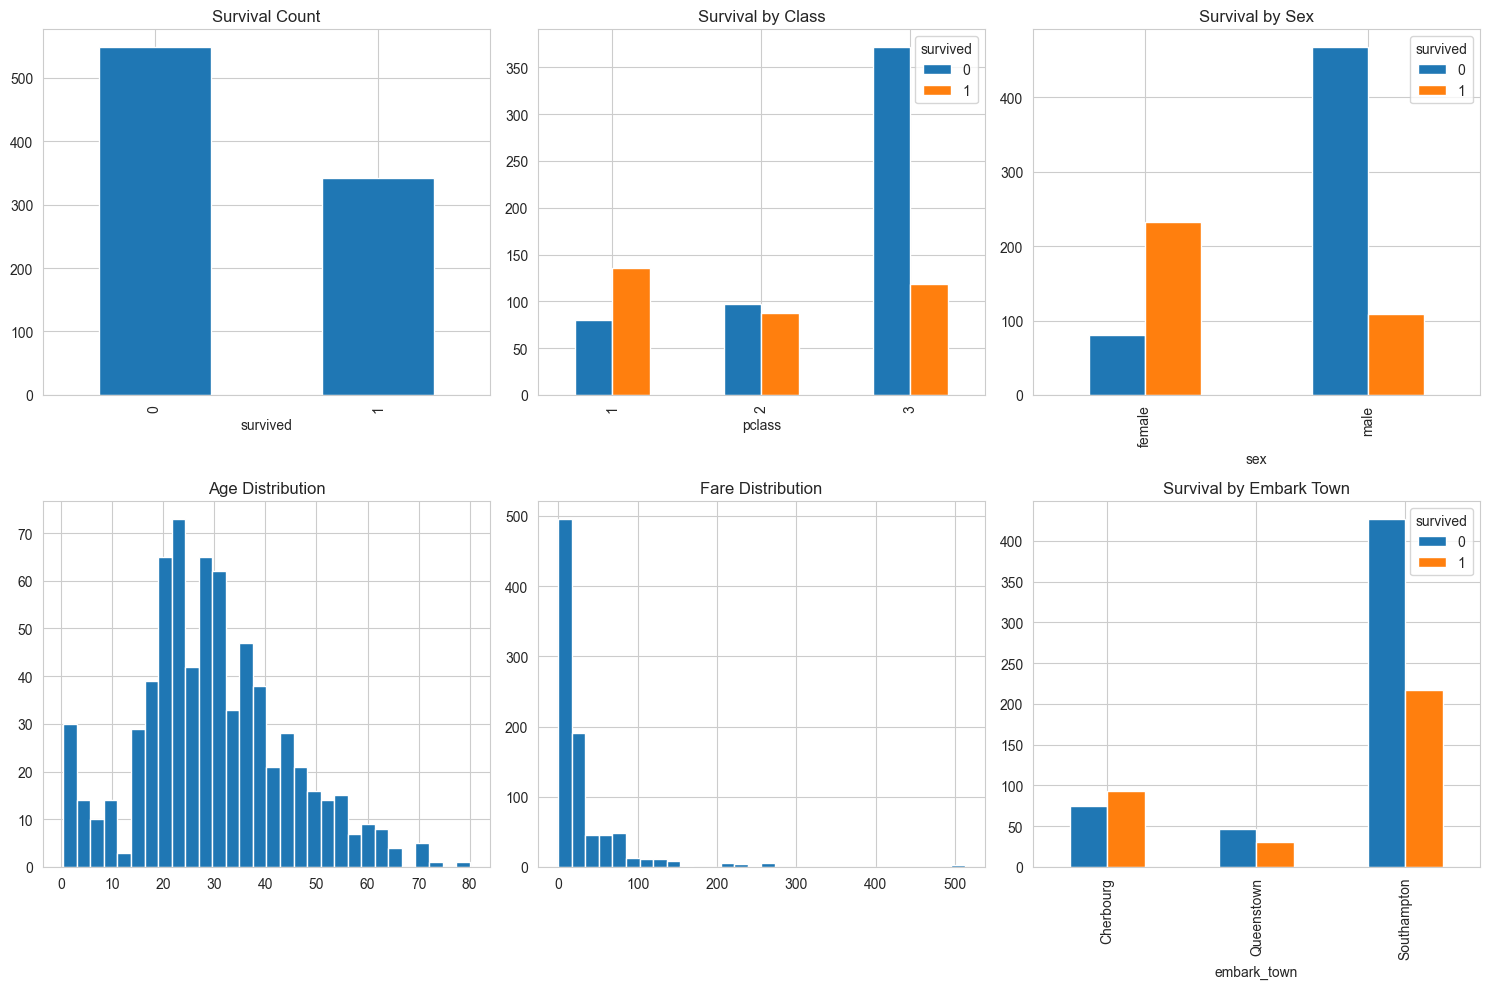

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Survival count
df['survived'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Survival Count')

# Survival by class
pd.crosstab(df['pclass'], df['survived']).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Survival by Class')

# Survival by sex
pd.crosstab(df['sex'], df['survived']).plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Survival by Sex')

# Age distribution
df['age'].hist(bins=30, ax=axes[1,0])
axes[1,0].set_title('Age Distribution')

# Fare distribution
df['fare'].hist(bins=30, ax=axes[1,1])
axes[1,1].set_title('Fare Distribution')

# Survival by embark town
pd.crosstab(df['embark_town'], df['survived']).plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Survival by Embark Town')

plt.tight_layout()
plt.show()


3. Data Preprocessing


In [ ]:
# Pilih fitur
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'alone']
df_model = df[features + ['survived']].copy()

# Tangani missing value
df_model['age'] = df_model['age'].fillna(df_model['age'].median())
df_model['fare'] = df_model['fare'].fillna(df_model['fare'].median())
df_model['embarked'] = df_model['embarked'].fillna(df_model['embarked'].mode()[0])

# Encoding data kategorik
le = LabelEncoder()
df_model['sex'] = le.fit_transform(df_model['sex'])
df_model['embarked'] = le.fit_transform(df_model['embarked'])

df_model.head()


,pclass,sex,age,sibsp,parch,fare,embarked,alone,survived
0,3,1,22.0,1,0,7.2500,2,False,0
1,1,0,38.0,1,0,71.2833,0,False,1
2,3,0,26.0,0,0,7.9250,2,True,1
3,1,0,35.0,1,0,53.1000,2,False,1
4,3,1,35.0,0,0,8.0500,2,True,0


 4. Split Data


In [ ]:
X = df_model.drop('survived', axis=1)
y = df_model['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data train:", X_train.shape)
print("Data test :", X_test.shape)


Data train: (712, 8)
Data test : (179, 8)


5. Model Decision Tree


In [ ]:
dt_best = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

dt_best.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

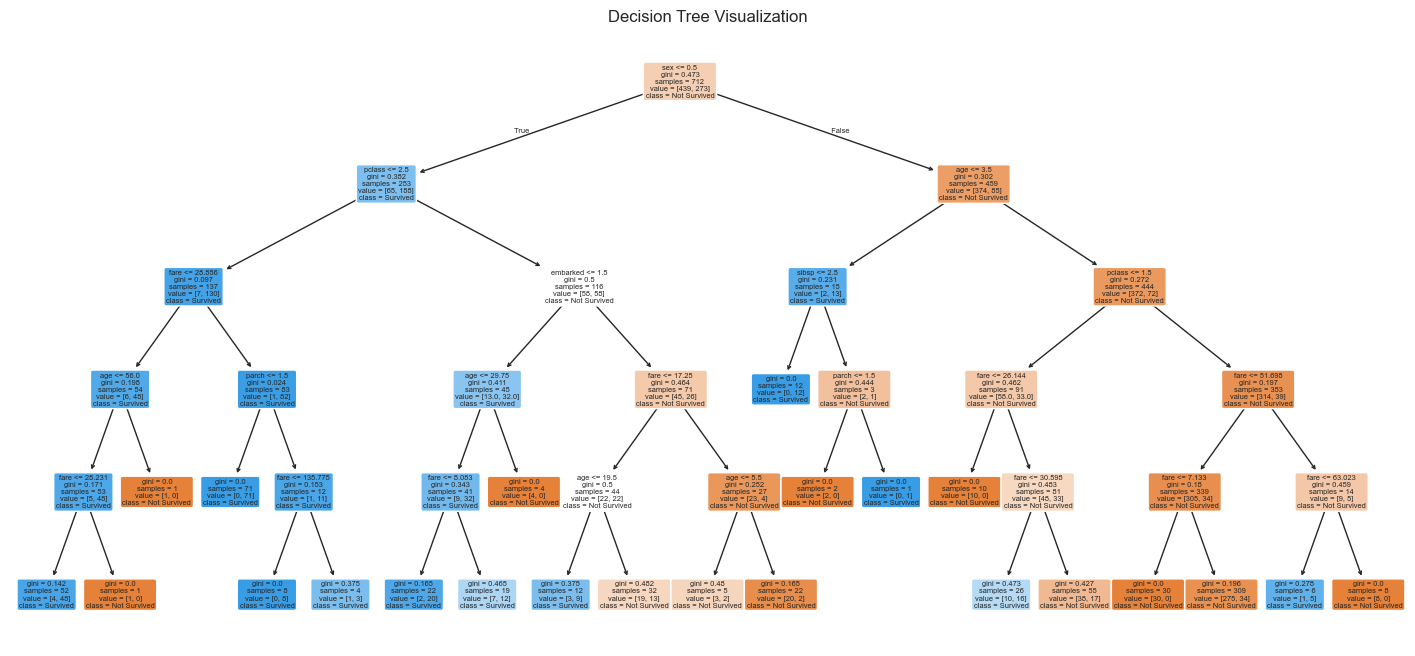

In [ ]:
plt.figure(figsize=(18, 8))

plot_tree(
    dt_best,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)

plt.title('Decision Tree Visualization')
plt.savefig('decision_tree_viz.png', dpi=300, bbox_inches='tight')
plt.show()


 6. Hyperparameter Tuning (Grid Search)


In [ ]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)
dt_best = grid.best_estimator_

grid.best_params_


{'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [ ]:
y_pred_best = dt_best.predict(X_test)

print(classification_report(
    y_test, y_pred_best,
    target_names=['Not Survived', 'Survived']
))


              precision    recall  f1-score   support

Not Survived       0.80      0.88      0.84       110
    Survived       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



 7. Confusion Matrix

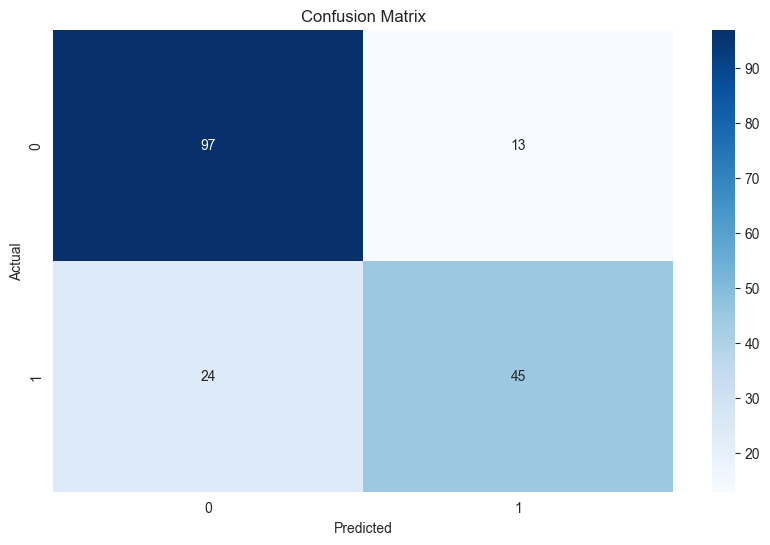

In [ ]:
cm = confusion_matrix(y_test, y_pred_best)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


8. Feature Importance

In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

importance


,Feature,Importance
1,sex,0.488400
5,fare,0.170725
0,pclass,0.169887
2,age,0.136914
6,embarked,0.031524
3,sibsp,0.001497
4,parch,0.001052
7,alone,0.000000


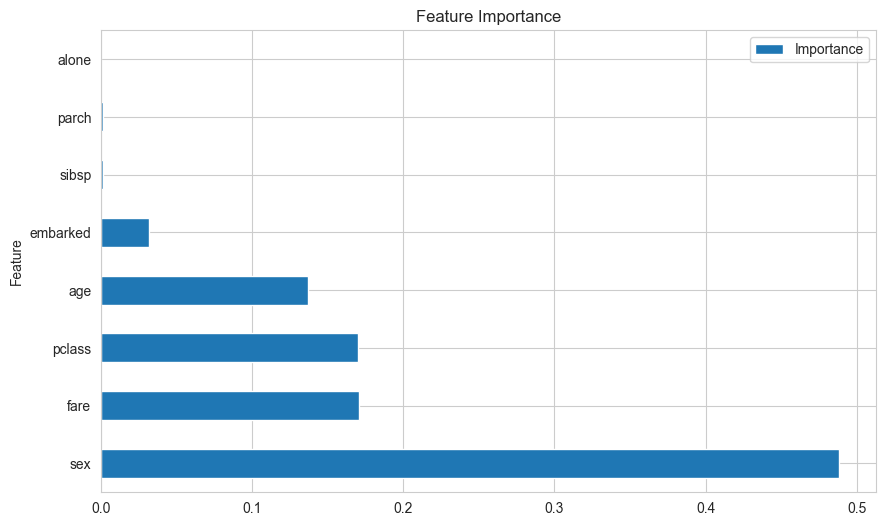

In [ ]:
importance.plot(kind='barh', x='Feature', y='Importance')
plt.title('Feature Importance')
plt.show()


10. Perbandingan dengan Ensemble Method


In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_best),
        accuracy_score(y_test, y_rf),
        accuracy_score(y_test, y_gb)
    ]
})

results


,Model,Accuracy
0,Decision Tree,0.793296
1,Random Forest,0.804469
2,Gradient Boosting,0.798883


 11. Kesimpulan

1. Decision Tree mampu memprediksi survival Titanic dengan baik
2. Feature paling berpengaruh adalah sex, fare, dan age
3. Ensemble method memberikan akurasi sedikit lebih tinggi
4. Decision Tree unggul dalam interpretabilitas

Model dapat dikembangkan lebih lanjut dengan feature engineering dan tuning lanjutan.
